# Customer Shopping Trends Analysis Summary

## Project Overview

We undertook an analysis of the Customer Shopping Trends dataset to understand customer behavior and preferences.

## Steps Taken

1. **Data Analysis:** Explored the dataset through exploratory data analysis, examining features, identifying outliers, and gaining insights into the data.

2. **Model Selection:** Applied Support Vector Regression (SVR) and K-Nearest Neighbors (KNN) to predict customer purchase behavior.


3. **Best Model Selection:** Evaluated model performance based on mean squared error and selected the K-Nearest Neighbors (KNN) model as the best-performing model.

4. **Model Tuning:** Initiated model tuning to optimize the selected KNN model further.


#The basic Python Packages

In [ ]:
import pandas as pd
import numpy as np

#Packages for plotting and graphs

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#Packages used for Machine learning


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error, median_absolute_error
from sklearn.model_selection import GridSearchCV

#Packges in case of any warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Selecting the colors and font for the graphs

In [ ]:
sns.set_palette('Spectral')
sns.set_style("whitegrid")
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (10, 4)
matplotlib.rcParams['figure.dpi'] = 100

#Importing/Loading the dataset

In [ ]:
path = '/content/drive/MyDrive/Dataset/shopping_trends_updated.csv'
data = pd.read_csv(path)

## Displaying the First Few Rows of the Dataset

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Column Names in the Dataset

In [ ]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

## Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

## Data Preprocessing

In [ ]:
np.round(data.drop('Customer ID', axis=1).describe())

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.0,3900.0,3900.0,3900.0
mean,44.0,60.0,4.0,25.0
std,15.0,24.0,1.0,14.0
min,18.0,20.0,2.0,1.0
25%,31.0,39.0,3.0,13.0
50%,44.0,60.0,4.0,25.0
75%,57.0,81.0,4.0,38.0
max,70.0,100.0,5.0,50.0


In [ ]:
# Assuming the exchange rate is 75 INR for 1 USD
exchange_rate = 75

# Convert Purchase Max to INR
purchase_max_inr = data['Purchase Amount (USD)'].max() * exchange_rate
print(f"Purchase Max (INR): {purchase_max_inr:,.2f}")

# Convert Purchase Min to INR
purchase_min_inr = data['Purchase Amount (USD)'].min() * exchange_rate
print(f"Purchase Min (INR): {purchase_min_inr:,.2f}")

# Convert Purchase Mean to INR
purchase_mean_inr = data['Purchase Amount (USD)'].mean() * exchange_rate
print(f"Purchase Mean (INR): {purchase_mean_inr:,.2f}")

Purchase Max (INR): 7,500.00
Purchase Min (INR): 1,500.00
Purchase Mean (INR): 4,482.33


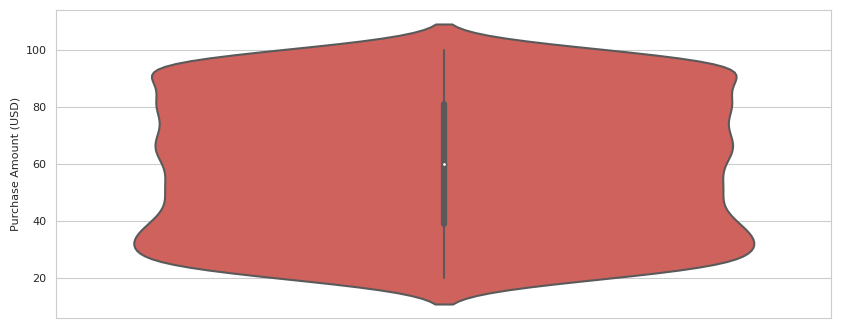

In [ ]:
sns.violinplot(data=data, y='Purchase Amount (USD)');

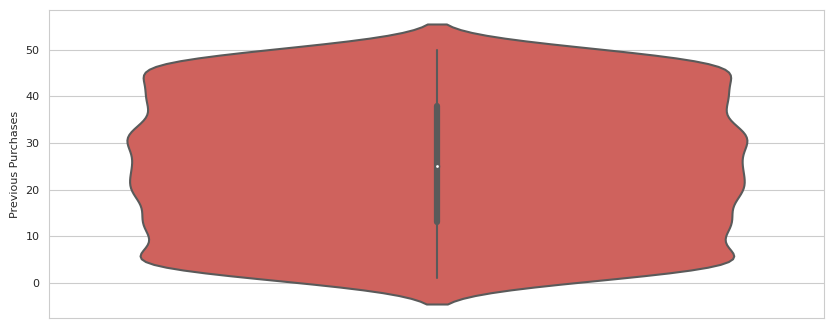

In [ ]:
sns.violinplot(data=data, y='Previous Purchases');

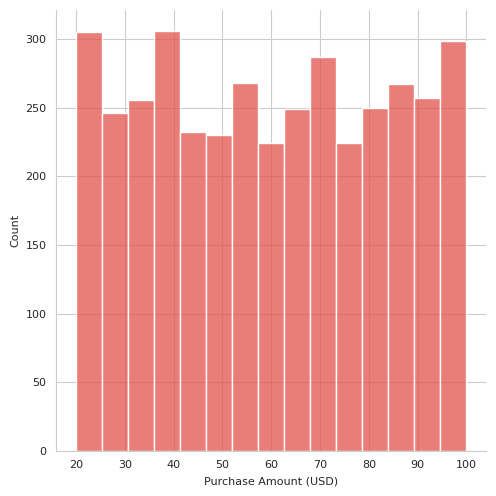

In [ ]:
sns.displot(data=data, x='Purchase Amount (USD)');

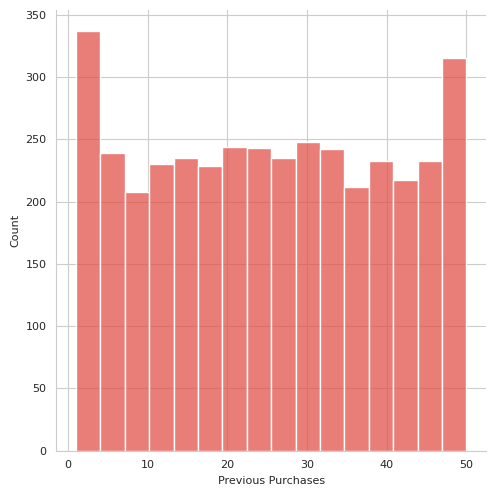

In [ ]:
sns.displot(data=data, x='Previous Purchases');

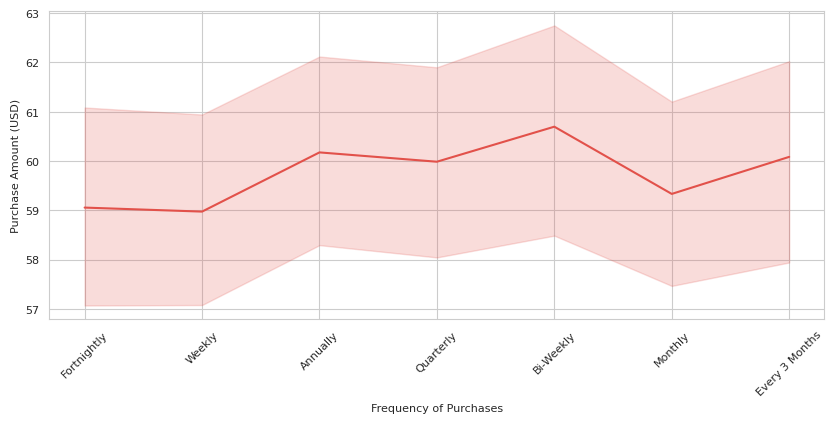

In [ ]:
sns.lineplot(data=data, x='Frequency of Purchases', y='Purchase Amount (USD)');
plt.xticks(rotation=45);

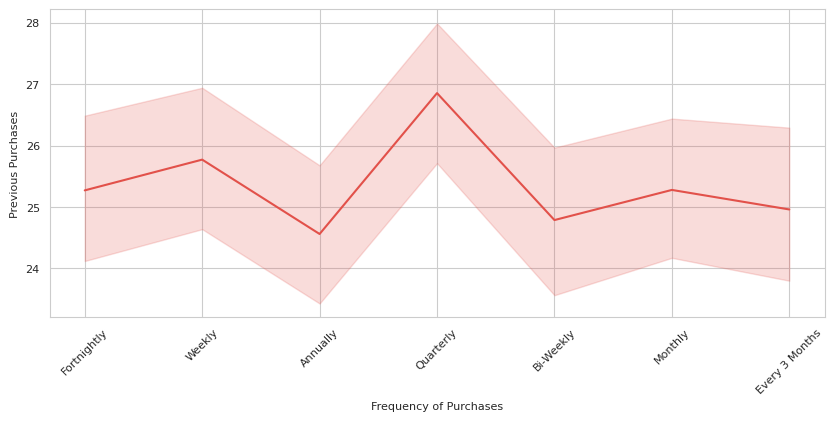

In [ ]:
sns.lineplot(data=data, x='Frequency of Purchases', y='Previous Purchases');
plt.xticks(rotation=45);

In [ ]:
data = data.drop('Customer ID', axis=1)

## Step 4: Machine Learning

Now that we have explored and preprocessed the data, we will proceed with applying machine learning algorithms for further analysis and predictions.

In [ ]:
catvars = data.select_dtypes(include=['object']).columns
numvars = data.select_dtypes(include = ['int32', 'int64', 'float32', 'float64']).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_data = data.filter(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'])


columns_to_encode = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

label_encoder = LabelEncoder()
for column in columns_to_encode:
    categorical_data[column + '_encoded'] = label_encoder.fit_transform(categorical_data[column])

categorical_data = categorical_data.drop(columns_to_encode, axis=1)

numerical_data = data.drop(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'], axis=1)

#Usefull Variables

In [ ]:
data_ml = pd.concat([categorical_data, numerical_data], axis=1)

In [ ]:
important_features = data_ml.filter(['Review Rating',
                                     'Payment Method_encoded',
                                     'Gender_encoded',
                                     'Frequency of Purchases_encoded',
                                     'Previous Purchases', 'Age', 'Purchase Amount (USD)'])

In [ ]:
X = important_features.drop('Purchase Amount (USD)', axis=1)
y = important_features['Purchase Amount (USD)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Machine Learning

In [ ]:
model_svr = SVR()
model_knn = KNeighborsRegressor()

In [ ]:
model_svr = SVR(kernel='linear')
model_knn = KNeighborsRegressor()

model_svr.fit(X_test, y_test)
model_knn.fit(X_test, y_test)

KNeighborsRegressor()

#Error analysis

In [ ]:
y_pred = model_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mae SVR: {mae:.2f}')

#knn mae
y_pred = model_knn.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mae KNN: {mae:.2f}')

Mae SVR: 20.53
Mae KNN: 17.82


In [ ]:
y_pred = model_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'mse SVR: {mse:.2f}')

#knn mse
y_pred = model_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'mse KNN: {mse:.2f}')

mse SVR: 559.33
mse KNN: 444.64


In [ ]:
#svr rmse
y_pred = model_svr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'rmse SVR: {rmse:.2f}')

#knn rmse
y_pred = model_knn.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'rmse KNN: {rmse:.2f}')

rmse SVR: 23.65
rmse KNN: 21.09


In [ ]:
#svr R²
y_pred = model_svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r2 SVR: {r2:.2f}')

#knn R²
y_pred = model_knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r2 KNN: {r2:.2f}')

r2 SVR: 0.00
r2 KNN: 0.21


In [ ]:
novo_knn = KNeighborsRegressor()
novo_knn.fit(X_test, y_test)
pred_novo_knn = novo_knn.predict(X_test)

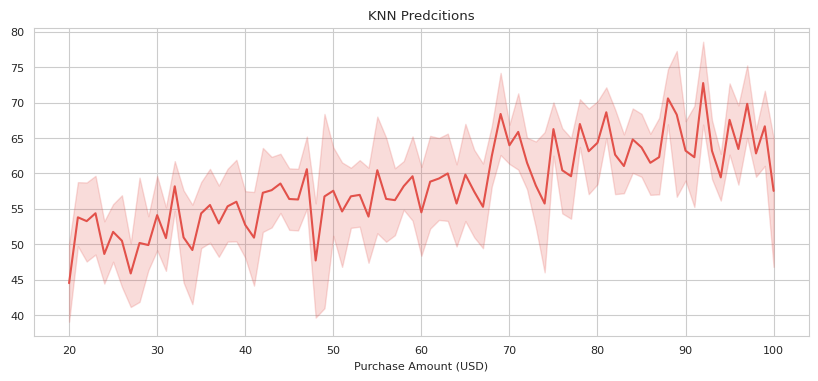

In [ ]:
sns.lineplot(x=y_test, y=pred_novo_knn);
plt.title("KNN Predcitions");

In [ ]:
model_grid = KNeighborsRegressor()

In [ ]:
model_grid.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
n_neighbors = list(range(1, 16))

paramns = {

    'leaf_size':[30, 60, 90],
    'n_neighbors':n_neighbors,
    'n_jobs': [-1]
}

In [ ]:
grid_search = GridSearchCV(model_grid, paramns, scoring='accuracy', cv=5)

In [ ]:
grid_search.fit(X_test, y_test)

best_params = grid_search.best_params_
acc = grid_search.best_estimator_.score(X_train, y_train)

In [ ]:
y_pred_novo = grid_search.predict(X_test)

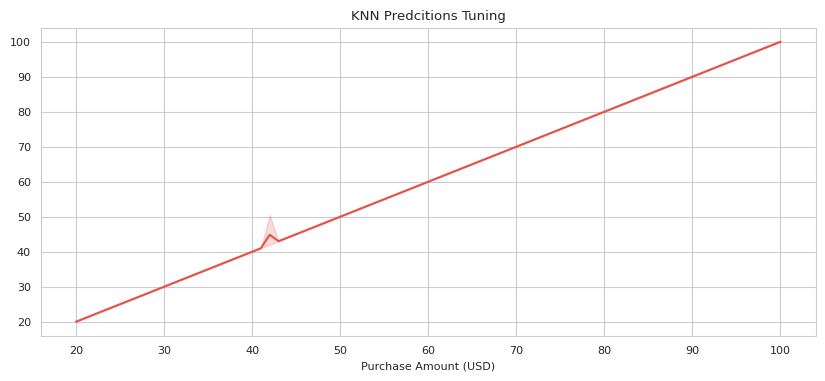

In [ ]:
sns.lineplot(x=y_test, y=y_pred_novo);
plt.title("KNN Predcitions Tuning");

In [ ]:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'mse KNN: {mse:.2f}')

mse KNN: 0.37


In [ ]:
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r2 KNN: {r2:.2f}')

r2 KNN: 1.00


In [ ]:
y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'rmse KNN: {rmse:.2f}')

rmse KNN: 0.61
